<a href="https://colab.research.google.com/github/suhanpark/Hand-Written-Number-Classifier/blob/main/Handwritten_Number_Claasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch as pt
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [5]:
# transformation to perform on the data before feeding it into pipeline
# making all images to have same dim and properties

transform = transforms.Compose([transforms.ToTensor(), # tensors into numbers
                                transforms.Normalize((0.5,), (0.5,)), # normalize 
                                ])

In [6]:
# loading datasets

trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True,
                          train=True, transform=transform)


valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True,
                          train=False, transform=transform)

trainloader = pt.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valloader = pt.utils.data.DataLoader(valset, batch_size=64, 
                                     shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

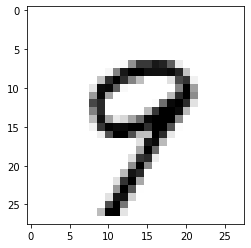

In [23]:
plt.imshow(images[2].numpy().squeeze(), cmap='gray_r')

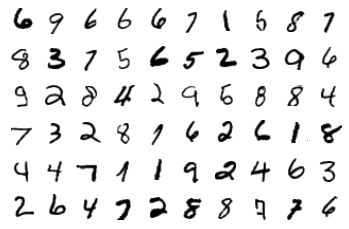

In [24]:
# grid of images in random order

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
  plt.subplot(6, 10, index)
  plt.axis('off')
  plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [25]:
input_size = 784 # 28x28
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [27]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) # log probabilities
loss = criterion(logps, labels) # calculate the NLL loss

In [29]:
loss

tensor(2.3234, grad_fn=<NllLossBackward>)

In [33]:
'Before Backward Pass: \n', model[0].weight.grad, loss.backward()

('Before Backward Pass: \n', None, None)

In [34]:
'After Backward Pass: \n', model[0].weight.grad

('After Backward Pass: \n',
 tensor([[ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
         [-0.0035, -0.0035, -0.0035,  ..., -0.0035, -0.0035, -0.0035],
         [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
         ...,
         [-0.0058, -0.0058, -0.0058,  ..., -0.0058, -0.0058, -0.0058],
         [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
         [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008]]))

In [36]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 20
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.2824412021063157
Epoch 1 - Training loss: 0.21999178743406908
Epoch 2 - Training loss: 0.17692707938505514
Epoch 3 - Training loss: 0.14788829095101655
Epoch 4 - Training loss: 0.1261196185105931
Epoch 5 - Training loss: 0.11048660727777779
Epoch 6 - Training loss: 0.09819001572103357
Epoch 7 - Training loss: 0.08655176145175515
Epoch 8 - Training loss: 0.07767016871838268
Epoch 9 - Training loss: 0.07188315759810097
Epoch 10 - Training loss: 0.06412809176632622
Epoch 11 - Training loss: 0.05860032635837245
Epoch 12 - Training loss: 0.055491405500740464
Epoch 13 - Training loss: 0.050063965327567114
Epoch 14 - Training loss: 0.046561731014903115
Epoch 15 - Training loss: 0.04390506604924671
Epoch 16 - Training loss: 0.03921808160792814
Epoch 17 - Training loss: 0.03656028538817234
Epoch 18 - Training loss: 0.035430812300480743
Epoch 19 - Training loss: 0.032144028424739096

Training Time (in minutes) = 3.9265249212582907


In [38]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 2
Predicted Digit = 2
Predicted Digit = 0
Predicted Digit = 4
Predicted Digit = 8
Predicted Digit = 2
Predicted Digit = 9
Predicted Digit = 3
Predicted Digit = 8
Predicted Digit = 0


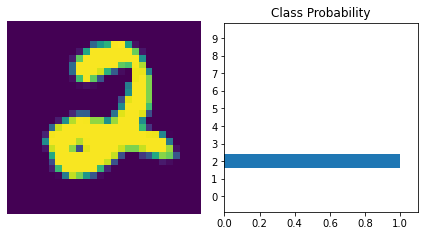

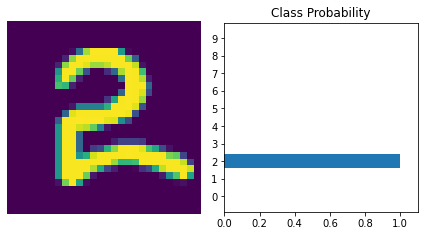

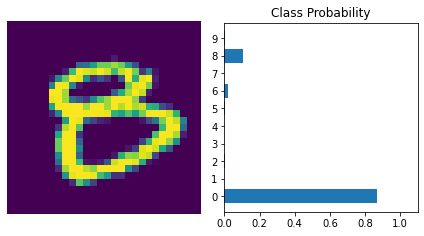

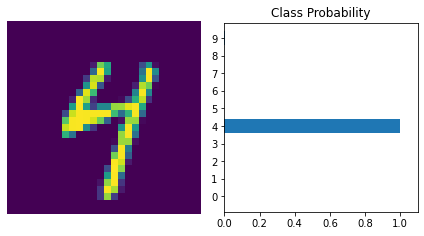

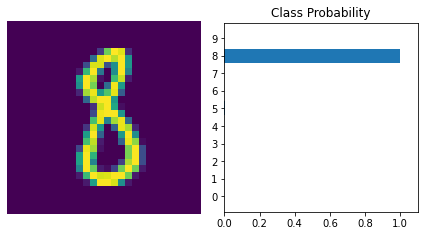

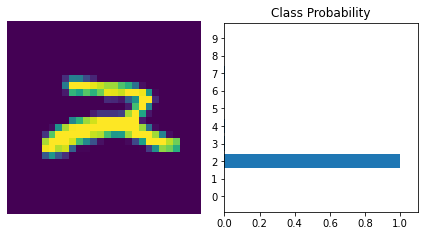

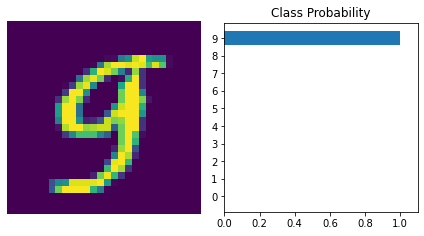

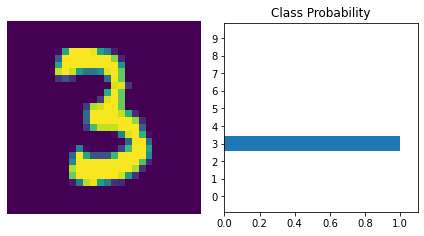

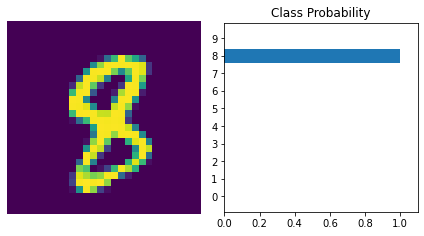

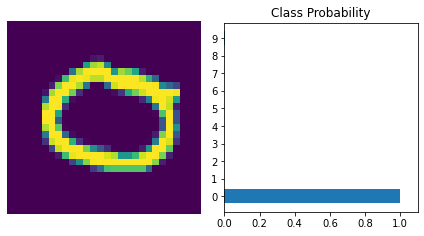

In [43]:
images, labels = next(iter(valloader))

for i in range(0, 10):
  img = images[i].view(1, 784)
  with pt.no_grad():
      logps = model(img)

  ps = pt.exp(logps)
  probab = list(ps.numpy()[0])
  print("Predicted Digit =", probab.index(max(probab)))
  view_classify(img.view(1, 28, 28), ps)

In [44]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with pt.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = pt.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9775
